载入数据

数据定义

In [70]:
#以下的数字代表是这个点的x坐标序号，+1 为y坐标序号 
# 0-21   index = 2 * num + 1
WRIST = 1 # 腕部关键点  
THUMB_TIP = 9 #大拇指顶点
INDEX_FINGER_TIP = 17 #食指顶点
MIDDLE_FINGER_TIP = 25 #中指顶点
RING_FINGER_TIP = 33 #无名指顶点
PINKY_TIP = 41#小指顶点

'''
WT  大拇指 ——> 腕部
WI  食指
WM  中指
WR  无名指
WP  小指
'''

WT = []
WI = []
WM = []
WR = []
WP = []

wt_extremes, wt_transitions, wt_high_to_low_times, wt_low_to_high_times = [],[],[],[]
wi_extremes, wi_transitions, wi_high_to_low_times, wi_low_to_high_times = [],[],[],[]
wm_extremes, wm_transitions, wm_high_to_low_times, wm_low_to_high_times = [],[],[],[]
wr_extremes, wr_transitions, wr_high_to_low_times, wr_low_to_high_times = [],[],[],[]
wp_extremes, wp_transitions, wp_high_to_low_times, wp_low_to_high_times = [],[],[],[]

计算局部最大值和最小值

In [71]:
def find_local_extremes(numbers):
    if len(numbers) < 3:
        return "输入的数字串过短，无法找到局部最大值和最小值"

    extremes = []
    transitions = []  # 记录时间变化点

    for i in range(1, len(numbers) - 1):
        if numbers[i] >= numbers[i - 1] and numbers[i] >= numbers[i + 1] and numbers[i - 1] != numbers[i + 1]:
            extremes.append((i, numbers[i], "最高点"))
        elif numbers[i] <= numbers[i - 1] and numbers[i] <= numbers[i + 1] and numbers[i - 1] != numbers[i + 1]:
            extremes.append((i, numbers[i], "最低点"))
        elif numbers[i - 1] == numbers[i + 1]:
            print("重复")
    
    if len(extremes) == 0:
        return "没有找到局部最大值和最小值"

    # 记录时间变化点
    for i in range(1, len(extremes)):
        if extremes[i][2] == "最高点" and extremes[i-1][2] == "最低点":
            transitions.append((extremes[i-1][0], extremes[i][0], "升为最高点", ))
        elif extremes[i][2] == "最低点" and extremes[i-1][2] == "最高点":
            transitions.append((extremes[i-1][0], extremes[i][0], "降为最低点"))

    return extremes, transitions



计算抓伸周期

In [72]:
def calculate_transition_times(transitions):
    high_to_low_times = []
    low_to_high_times = []

    for i in range(1, len(transitions)):
        if transitions[i][2] == "降为最低点" :
            high_to_low_time = transitions[i][1] - transitions[i][0]
            high_to_low_times.append(high_to_low_time)
        elif transitions[i][2] == "升为最高点" :
            low_to_high_time = transitions[i][1] - transitions[i][0]
            low_to_high_times.append(low_to_high_time)

    return high_to_low_times, low_to_high_times

计算2、3、4、5指相对于腕部关键点的距离

In [73]:
def calculate_distance(label):
    for line in label:
        x1, y1 = line[1], line[2]
    coordinates = [(line[i], line[i + 1]) for i in range(9, 42, 8)]

    distances = [math.sqrt((x - x1) ** 2 + (y - y1) ** 2) for x, y in coordinates]

    wt_distance, wi_distance, wm_distance, wr_distance, wp_distance = distances

    WT.append(wt_distance)
    WI.append(wi_distance)
    WM.append(wm_distance)
    WR.append(wr_distance)
    WP.append(wp_distance)

249
249


In [74]:
def get_results(data):
    extremes, transitions = find_local_extremes(data)
    high_to_low_times, low_to_high_times = calculate_transition_times(transitions)
    return extremes, transitions, high_to_low_times, low_to_high_times


In [76]:
def print_table():
    wt_extremes, wt_transitions, wt_high_to_low_times, wt_low_to_high_times = get_results(WT)
    wi_extremes, wi_transitions, wi_high_to_low_times, wi_low_to_high_times = get_results(WI)
    wm_extremes, wm_transitions, wm_high_to_low_times, wm_low_to_high_times = get_results(WM)
    wr_extremes, wr_transitions, wr_high_to_low_times, wr_low_to_high_times = get_results(WR)
    wp_extremes, wp_transitions, wp_high_to_low_times, wp_low_to_high_times = get_results(WP)
    
    wt_info = ['WT', max(wt_high_to_low_times), min(wt_high_to_low_times), sum(wt_high_to_low_times) / len(wt_high_to_low_times), max(wt_low_to_high_times), min(wt_low_to_high_times),sum(wt_low_to_high_times) / len(wt_low_to_high_times)]
    wi_info = ['WI', max(wi_high_to_low_times), min(wi_high_to_low_times), sum(wi_high_to_low_times) / len(wi_high_to_low_times), max(wi_low_to_high_times), min(wi_low_to_high_times),sum(wi_low_to_high_times) / len(wi_low_to_high_times)]
    wm_info = ['WM', max(wm_high_to_low_times), min(wm_high_to_low_times), sum(wm_high_to_low_times) / len(wm_high_to_low_times), max(wm_low_to_high_times), min(wm_low_to_high_times),sum(wm_low_to_high_times) / len(wm_low_to_high_times)]
    wr_info = ['WR', max(wr_high_to_low_times), min(wr_high_to_low_times), sum(wr_high_to_low_times) / len(wr_high_to_low_times), max(wr_low_to_high_times), min(wr_low_to_high_times),sum(wr_low_to_high_times) / len(wr_low_to_high_times)]
    wp_info = ['WP', max(wp_high_to_low_times), min(wp_high_to_low_times), sum(wp_high_to_low_times) / len(wp_high_to_low_times), max(wp_low_to_high_times), min(wp_low_to_high_times),sum(wp_low_to_high_times) / len(wp_low_to_high_times)]

    table_header = ['name', 'high_to_low_time: max_time', 'min_time', 'avg_time',  'low_to_high_time: max_time', 'min_time', 'avg_time']
    table_data =[wt_info, wi_info, wm_info, wr_info, wp_info]
    print(tabulate(table_data, headers=table_header, tablefmt='fancy_grid'))

In [77]:
print(tabulate(table_data, headers=table_header, tablefmt='fancy_grid'))

╒════════╤══════════════════════════════╤════════════╤════════════╤══════════════════════════════╤════════════╤════════════╕
│ name   │   high_to_low_time: max_time │   min_time │   avg_time │   low_to_high_time: max_time │   min_time │   avg_time │
╞════════╪══════════════════════════════╪════════════╪════════════╪══════════════════════════════╪════════════╪════════════╡
│ WT     │                            7 │          1 │    2.55263 │                            9 │          1 │    3.53846 │
├────────┼──────────────────────────────┼────────────┼────────────┼──────────────────────────────┼────────────┼────────────┤
│ WI     │                            7 │          1 │    2.69444 │                           12 │          1 │    4       │
├────────┼──────────────────────────────┼────────────┼────────────┼──────────────────────────────┼────────────┼────────────┤
│ WM     │                            7 │          1 │    2.68421 │                           10 │          1 │    3.68421 │


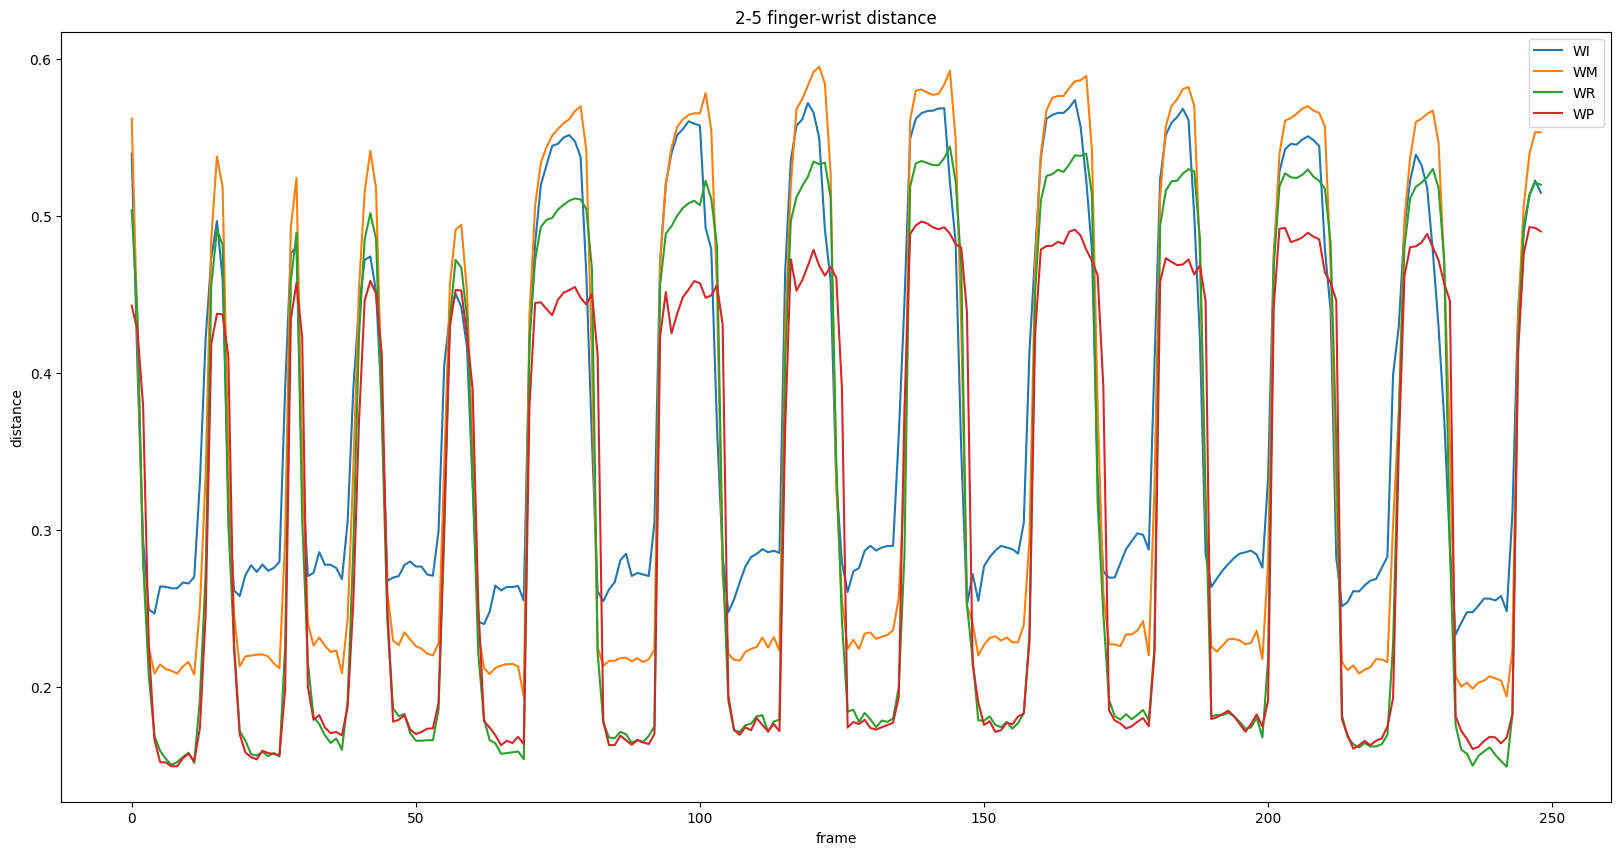

In [80]:
''' import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

plt.figure(figsize=(20, 10))

#plt.plot(WT, label="WT")
plt.plot(WI, label="WI")
plt.plot(WM, label="WM")
plt.plot(WR, label="WR")
plt.plot(WP, label="WP")
# 添加图例
plt.legend()

# 添加标签和标题
plt.xlabel('frame')
plt.ylabel('distance')
plt.title('2-5 finger-wrist distance')

#x_major_locator=MultipleLocator(50)
#把x轴的刻度间隔设置为50，并存在变量里
#y_major_locator=MultipleLocator(0.1)
#把y轴的刻度间隔设置为0.1，并存在变量里
#ax=plt.gca()
#ax为两条坐标轴的实例
#ax.xaxis.set_major_locator(x_major_locator)

#ax.yaxis.set_major_locator(y_major_locator)

plt.show() '''

2指、5指根部关键点与手腕关键点所围成的面积

In [81]:
def calculate_area(label):
    area_list = []
    for line in label :
        x1, y1 = line[1], line[2]   #腕部关键点坐标
        x2, y2 = line[17], line[18]
        x3, y3 = line[41], line[42]
        area = 0.5 * abs(x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2))
        area_list.append(area)
    return area_list


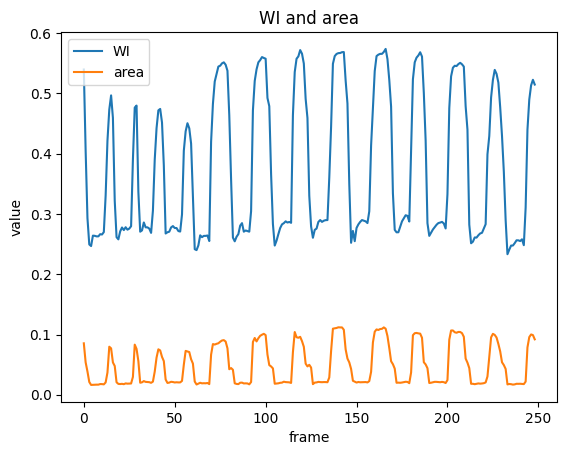

In [82]:
''' import matplotlib.pyplot as plt



plt.plot(WI, label="WI")
plt.plot(area_list, label="area")

# 添加图例
plt.legend()

# 添加标签和标题
plt.xlabel('frame')
plt.ylabel('value')
plt.title('WI and area')
 
# 显示图形
plt.show() '''

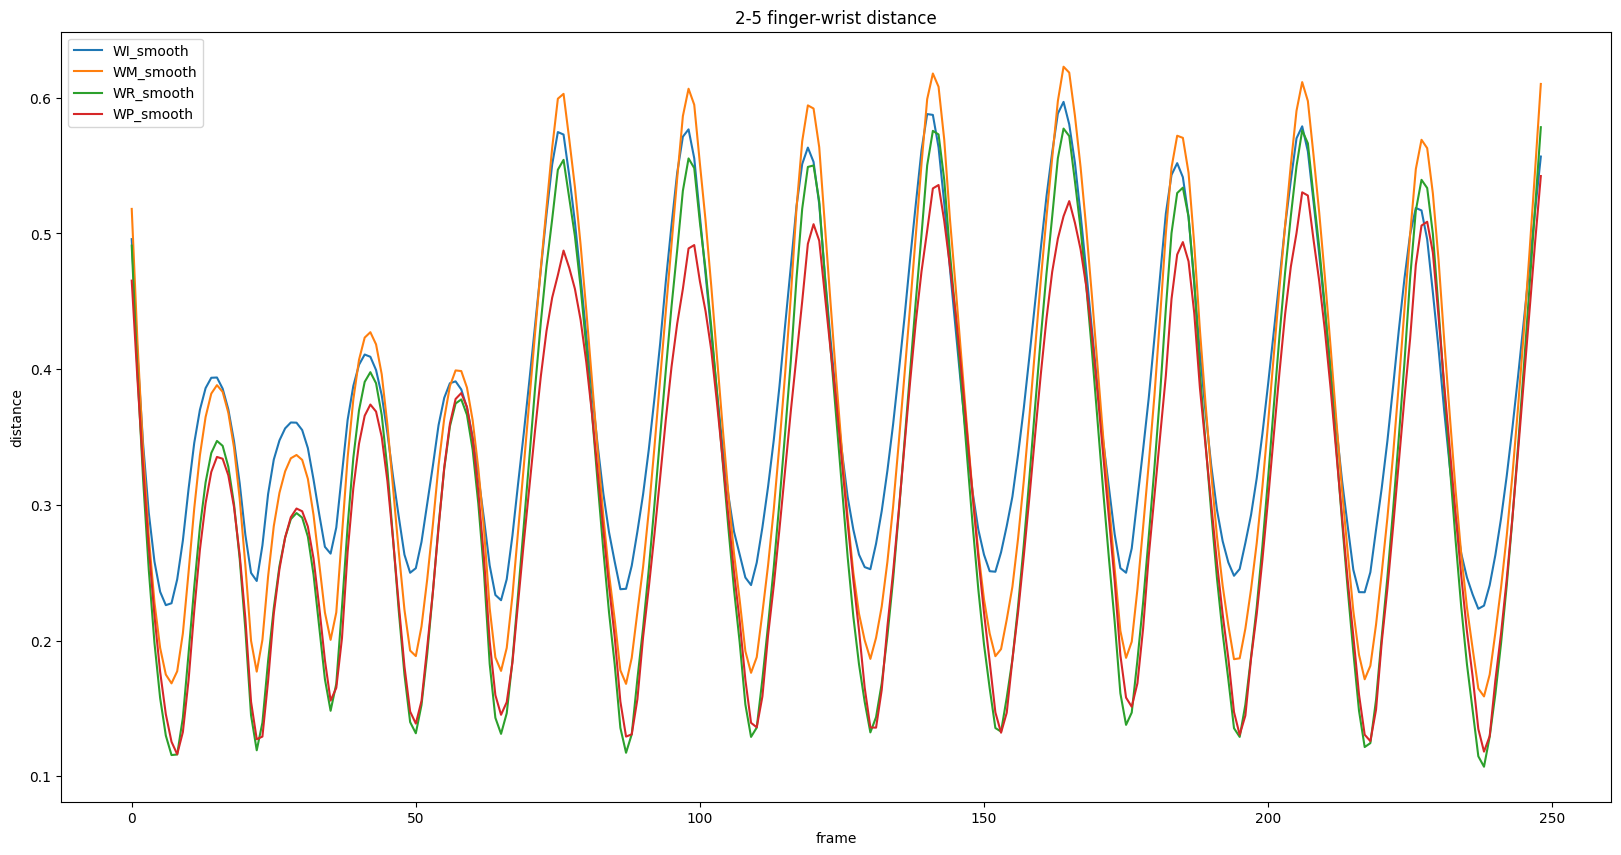

In [85]:
''' import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

plt.figure(figsize=(20, 10))

WI_smooth = scipy.signal.savgol_filter(WI,15,3)
WM_smooth = scipy.signal.savgol_filter(WM,15,3)
WR_smooth = scipy.signal.savgol_filter(WR,15,3)
WP_smooth = scipy.signal.savgol_filter(WP,15,3)
#plt.plot(WT, label="WT")
#plt.plot(WI, label="WI")
plt.plot(WI_smooth,label="WI_smooth")
#plt.plot(WM, label="WM")
plt.plot(WM_smooth, label="WM_smooth")
#plt.plot(WR, label="WR")
plt.plot(WR_smooth, label="WR_smooth")
#plt.plot(WP, label="WP")
plt.plot(WP_smooth, label="WP_smooth")
# 添加图例
plt.legend()

# 添加标签和标题
plt.xlabel('frame')
plt.ylabel('distance')
plt.title('2-5 finger-wrist distance')

#x_major_locator=MultipleLocator(50)
#把x轴的刻度间隔设置为50，并存在变量里
#y_major_locator=MultipleLocator(0.1)
#把y轴的刻度间隔设置为0.1，并存在变量里
#ax=plt.gca()
#ax为两条坐标轴的实例
#ax.xaxis.set_major_locator(x_major_locator)

#ax.yaxis.set_major_locator(y_major_locator)

plt.show() '''

In [89]:
wi_smooth_extremes, wi_smooth_transitions, wi_smooth_high_to_low_times, wi_smooth_low_to_high_times = get_results(WI_smooth)
wm_smooth_extremes, wm_smooth_transitions, wm_smooth_high_to_low_times, wm_smooth_low_to_high_times = get_results(WM_smooth)
wr_smooth_extremes, wr_smooth_transitions, wr_smooth_high_to_low_times, wr_smooth_low_to_high_times = get_results(WR_smooth)
wp_smooth_extremes, wp_smooth_transitions, wp_smooth_high_to_low_times, wp_smooth_low_to_high_times = get_results(WP_smooth)


In [102]:
def calculate_time_differences(curve1_transitions, curve2_transitions):
    # 初始化变量
    start_differences = []
    end_differences = []

    # 遍历每个周期
    for i in range(min(len(curve1_transitions), len(curve2_transitions))):
        # 找到两条曲线的第一个极值点的帧数
        start_frame_curve1 = curve1_transitions[i][0]
        start_frame_curve2 = curve2_transitions[i][0]

        # 找到两条曲线的最后一个极值点的帧数
        end_frame_curve1 = curve1_transitions[i][1]
        end_frame_curve2 = curve2_transitions[i][1]
        

        # 计算启动时间差和结束时间差，并添加到列表中
        if i % 2 == 0 :
            start_differences.append(start_frame_curve2 - start_frame_curve1)
        else:
            end_differences.append(end_frame_curve2 - end_frame_curve1)

    return start_differences, end_differences


# 计算时间差
start_differences, end_differences = calculate_time_differences(wi_smooth_transitions, wm_smooth_transitions)

# 打印结果
for i in range(len(start_differences)):
    print(f"第{i + 1}周期启动时间差: {start_differences[i]} 帧")
    print(f"第{i + 1}周期结束时间差: {end_differences[i]} 帧")


第1周期启动时间差: 1 帧
第1周期结束时间差: 0 帧
第2周期启动时间差: 0 帧
第2周期结束时间差: 0 帧
第3周期启动时间差: 0 帧
第3周期结束时间差: 1 帧
第4周期启动时间差: 1 帧
第4周期结束时间差: 0 帧
第5周期启动时间差: 0 帧
第5周期结束时间差: 1 帧
第6周期启动时间差: 1 帧
第6周期结束时间差: 0 帧
第7周期启动时间差: 0 帧
第7周期结束时间差: 0 帧
第8周期启动时间差: 0 帧
第8周期结束时间差: 0 帧
第9周期启动时间差: 0 帧
第9周期结束时间差: 0 帧
第10周期启动时间差: 0 帧
第10周期结束时间差: 0 帧
第11周期启动时间差: 0 帧
第11周期结束时间差: 0 帧
第12周期启动时间差: 0 帧
第12周期结束时间差: 1 帧


In [ ]:
def calculate(file_path):
    # 打开JSON文件并加载数据
    with open(file_path, 'r') as file:
        data = json.load(file)

    # 构建保存结果的txt文件路径
    output_file = file_path.replace(".json", ".txt")

    # 提取 "label" 字段到一个列表
    label = data["label"]

    #记录2-5指抓伸距离
    calculate_distance(label)

    #计算每根手指的最大/最小/平均抓时间、最大/最小/平均伸时间
    print_table(label)

    #以2指抓伸运动为基准（代表整个手部的抓伸周期），计算3/4/5指各自抓伸周期启动/结束的时间差
    start_differences, end_differences = calculate_time_differences(wi_smooth_transitions, wm_smooth_transitions)

    #通过2、5指根部关键点与腕部关键点建立一个三角形平面
    area = calculate_area(label)
    
    



In [ ]:
import os
import json
from tabulate import  tabulate
import math

folder_path = '/Users/yql/scut/labeling/output'

# 遍历文件夹中的所有文件
for filename in os.listdir(folder_path):
    # 确保文件是以 .json 结尾的
    if filename.endswith(".json"):
        # 构建完整的文件路径
        file_path = os.path.join(folder_path, filename)

        result_txt = calculate(file_path)

        # 构建保存结果的txt文件路径
        txt_file_path = os.path.join(folder_path, filename.replace(".json", ".txt"))

        # 将处理后的内容写入txt文件
        with open(txt_file_path, 'w') as txt_file:
            txt_file.write(result_txt)